<a href="https://colab.research.google.com/github/kingrapture/kingrapture/blob/main/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-03: Visualization with Matplotlib and Seaborn on Titanic Dataset

Context:

You are a data visualization analyst working with the Titanic dataset, which contains information about passengers on the Titanic, including whether they survived or not, their class, age, fare, etc. Your task is to use Matplotlib and Seaborn to visualize and explore various aspects of the dataset to gain insights into passenger demographics and characteristics.

Task 1: Load the Dataset and Explore

Download the Titanic dataset and assign it to a DataFrame.
Display the first few rows to get an overview of the data.

In [1]:
import numpy as np # numericial and statistical methods library, provides N-dimensional library arrays (ndarray), in other words, does numbers
import pandas as pd # dataframe library, built on top of numpy, assembles ndarrays into 2D or higher order data, in short the spreadsheets or turn data into tables
import matplotlib.pyplot as plt # charting and plotting library, paraphrase artists draw charts
import seaborn as sns # charting and plotting with significantly ease to use interface; rephrase to beautify the charts
# sns.get_dataset_names()
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Task 2: Visualize Passenger Survival

Create a bar plot using seaborn to visualize the count of survivors and non-survivors.

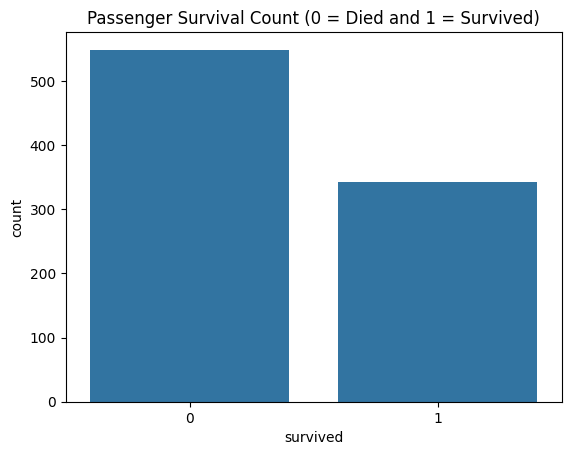

In [4]:
sns.countplot(data=df, x='survived')
plt.title('Passenger Survival Count (0 = Died and 1 = Survived)')
plt.show()

Text(0, 0.5, 'Count of Passengers')

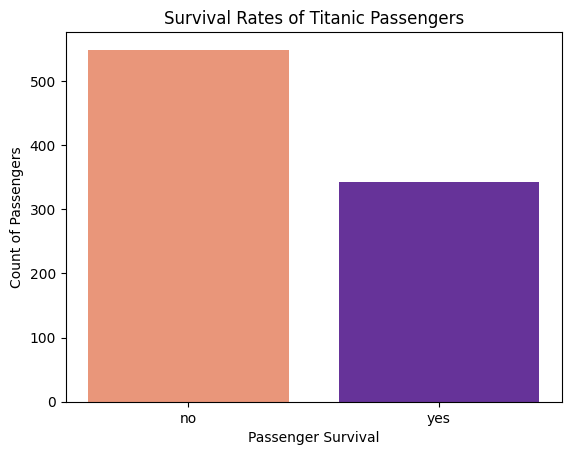

In [5]:
# matplotlib style
living_count = df['alive'].value_counts()

# using plt.bar(classes, class sizes, colours)
plt.bar(living_count.index, living_count, color = ["darksalmon", "rebeccapurple"])

plt.title("Survival Rates of Titanic Passengers")
plt.xlabel("Passenger Survival")
plt.ylabel("Count of Passengers")

Task 3: Analyze Passenger Age Distribution

Create a histogram using matplotlib to show the distribution of passenger ages.

In [6]:
# data cleaning step for missing values in age
median_age = df["age"].median()
df["age"].fillna(median_age, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


/tmp/ipython-input-6-3634245286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(median_age, inplace = True)


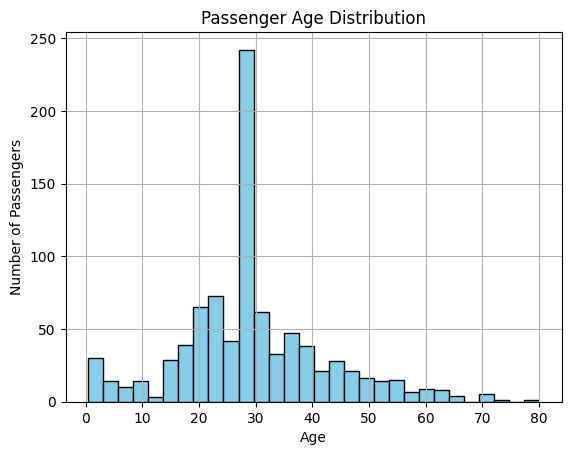

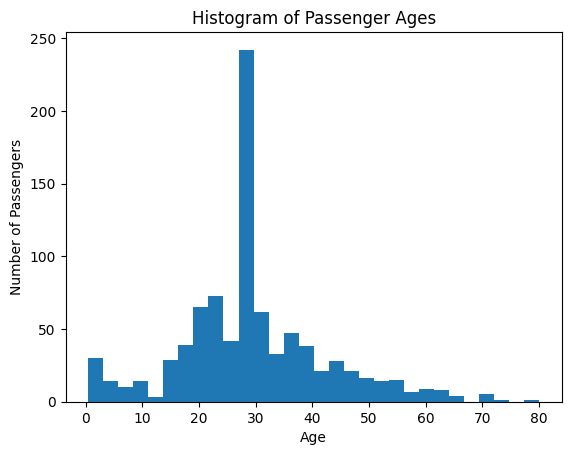

In [7]:
# Plot the age distribution as a histogram
plt.hist(df['age'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

plt.hist(df['age'], bins = 30)
plt.title("Histogram of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

Task 4: Explore Class-wise Distribution

Use seaborn to create a count plot to display the number of passengers in each class.

/tmp/ipython-input-8-2186538516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pclass', palette='pastel')


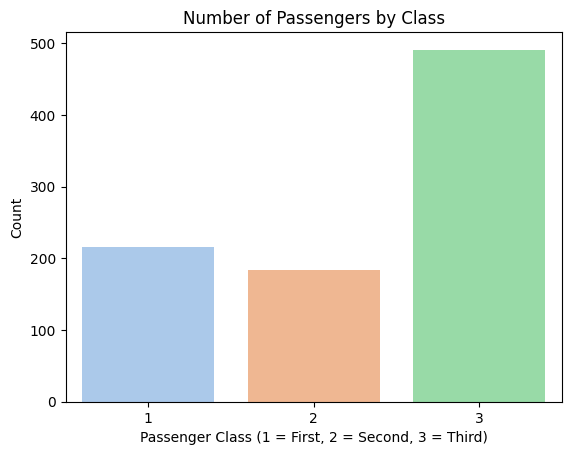

In [8]:
# Create a count plot of passenger classes
sns.countplot(data=df, x='pclass', palette='pastel')
plt.title("Number of Passengers by Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count")
plt.show()

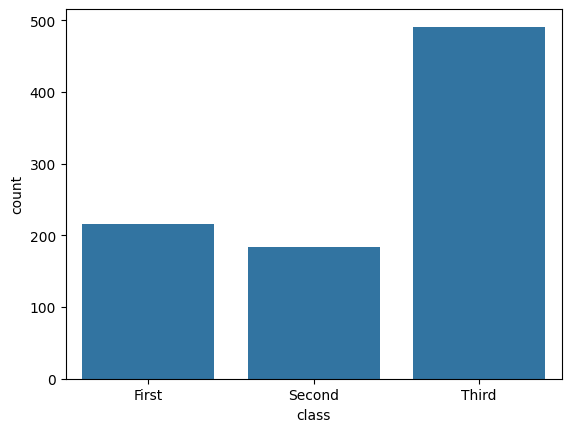

In [9]:
sns.countplot(x = "class", data = df)
plt.show()

Task 5: Investigate Fare Distribution

Create a box plot using seaborn to visualize the distribution of passenger fares.

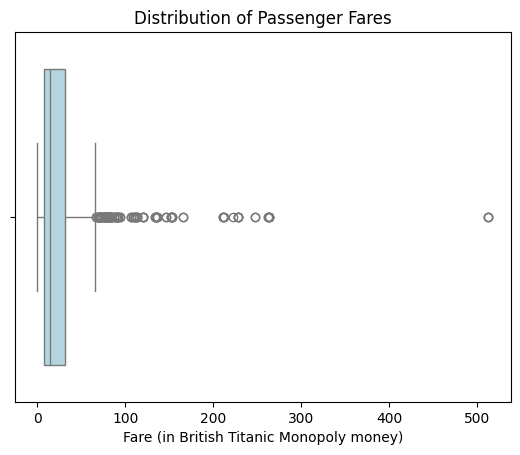

In [12]:
# Create a box plot for the 'Fare' column
sns.boxplot(data=df, x='fare', color='lightblue')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare (in British Titanic Monopoly money)')
plt.show()

# The box is the middle 50% of fares (the IQR).
# The line inside the box is the median fare—what most people paid.

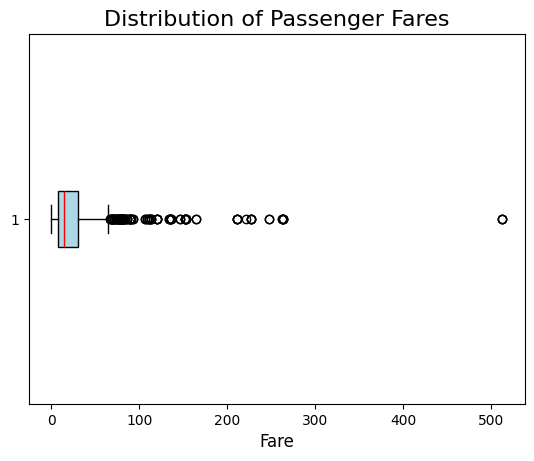

In [13]:
fares = df['fare']

plt.boxplot(fares, vert=False, patch_artist = True, boxprops=dict(facecolor='lightblue', color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='red')
)


plt.title('Distribution of Passenger Fares', fontsize=16)
plt.xlabel('Fare', fontsize=12)

plt.show()

Task 6: Correlation Between Variables

Generate a heatmap using seaborn to visualize the correlation matrix of the numerical variables in the dataset.

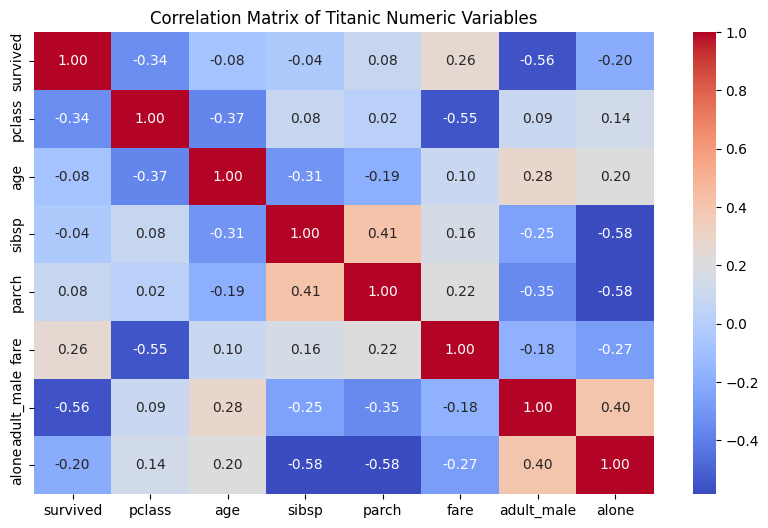

In [18]:
# Compute correlation matrix (only numeric columns)
correlation_matrix = df.corr(numeric_only=True) # Calculates the Pearson correlation coefficients between all numeric columns. You know, math—not names or ports.

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# annot=True: Writes the actual correlation values on the map.
# cmap='coolwarm': Blue for enemies, red for lovers.
# fmt=".2f": Rounds those values before they make your brain ache.
plt.title("Correlation Matrix of Titanic Numeric Variables")
plt.show()

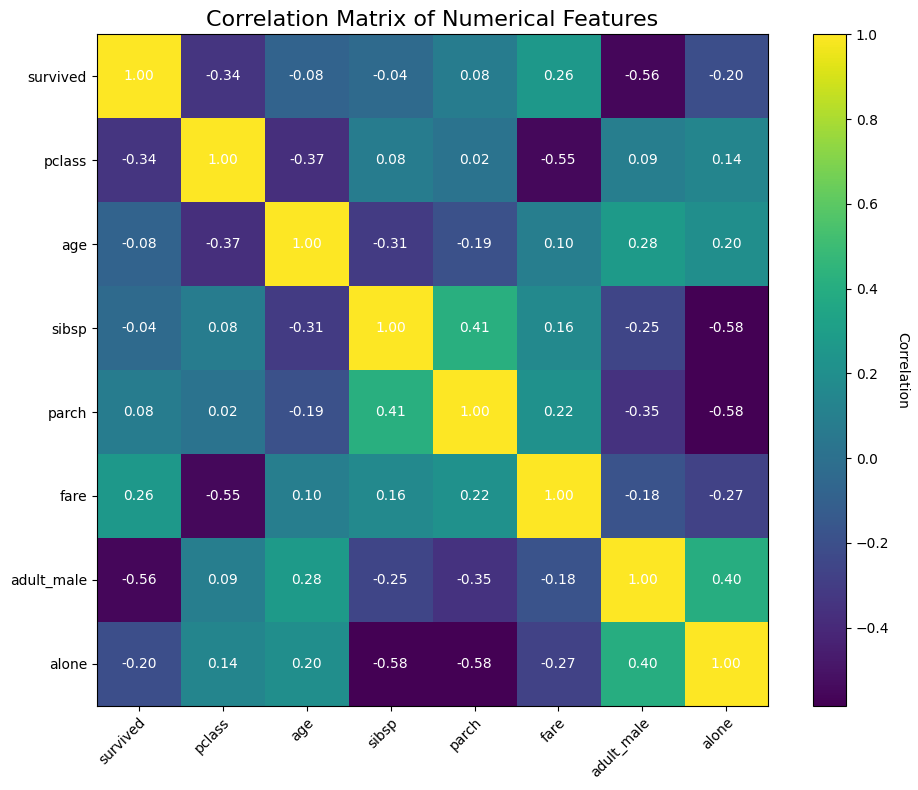

In [19]:
# --- Matplotlib: Correlation Heatmap ---

# 1. Calculate the correlation matrix for numerical columns
corr_matrix = df.corr(numeric_only=True)

# 2. Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='viridis')

# 3. Create the colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

# 4. Set ticks and labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# 5. Loop over data dimensions and create text annotations.
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="w")

ax.set_title("Correlation Matrix of Numerical Features", fontsize=16)
fig.tight_layout()
plt.show()

Task 7: Visualize Passenger Class and Age

Create a scatter plot using matplotlib to show the relationship between passenger age and class.

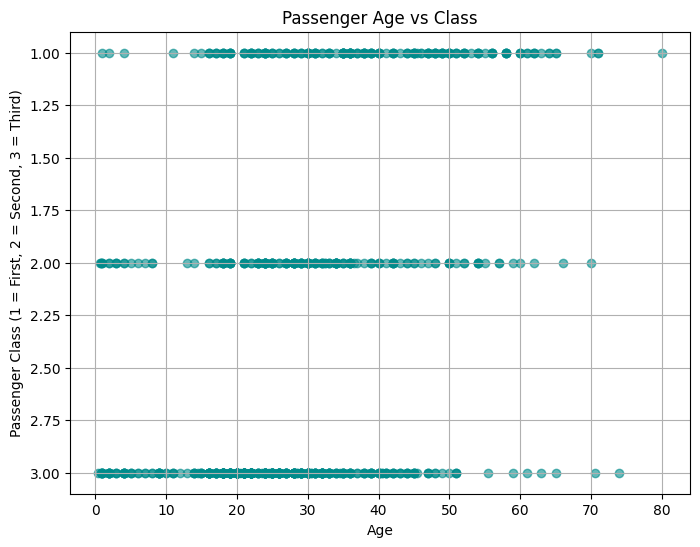

In [27]:
# Plot: Age vs Pclass
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['pclass'], alpha=0.6, color='darkcyan')
plt.title('Passenger Age vs Class') # Each dot is a passenger.
plt.xlabel('Age') # X-axis = their age.
plt.ylabel('Passenger Class (1 = First, 2 = Second, 3 = Third)') # Y-axis = class (1, 2, 3), but we invert it to show Class 1 at the top—like the ship layout.
plt.gca().invert_yaxis()  # Because Class 1 should be visually "higher" | #Alpha = transparency, so overlaps don't become a blob.
plt.grid(True)
plt.show()

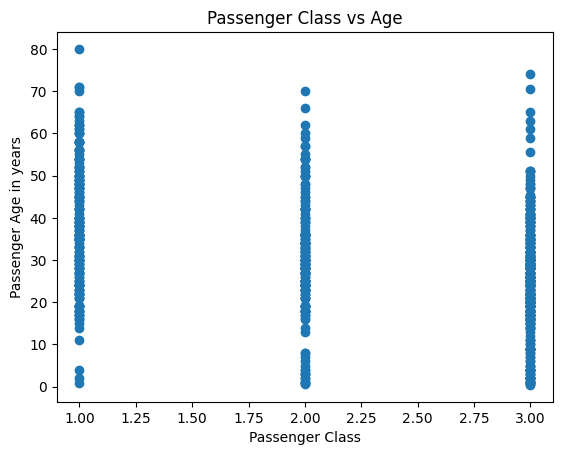

In [28]:
plt.scatter(df['pclass'], df['age'])

plt.title("Passenger Class vs Age")
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Age in years")

plt.show()

/tmp/ipython-input-32-2498851129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(
/tmp/ipython-input-32-2498851129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])  # Optional, for clarity


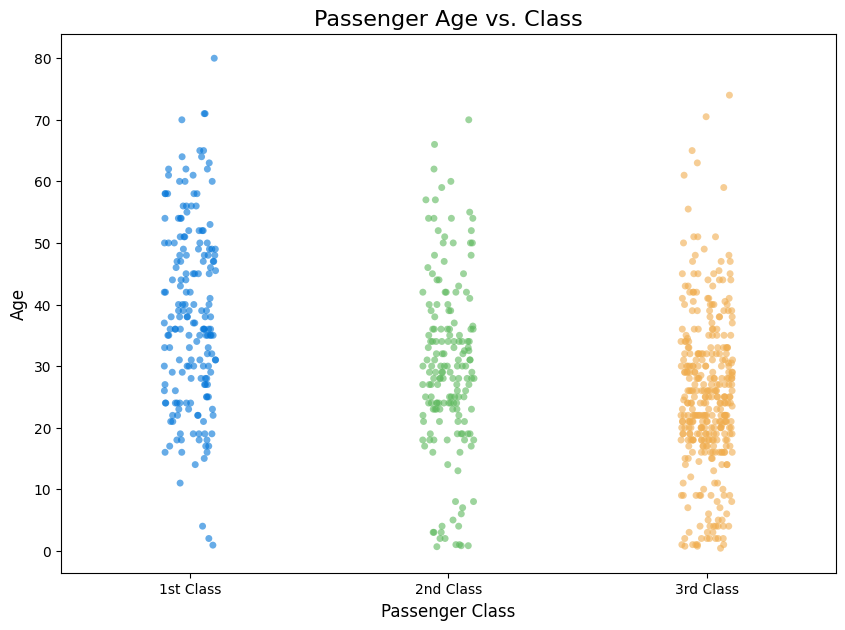

Rich passengers (Class 1) spanned all age groups. Class 3? Mostly poor and mostly young.Age buys wisdom. Class buys lifeboats.


In [32]:
# --- Seaborn: Class vs. Age ---
plt.figure(figsize=(10, 7))
ax = sns.stripplot(
    x='pclass',
    y='age',
    data=df,
    jitter=True,     # Avoid stacking points
    alpha=0.6,
    palette=['#0275d8', '#5cb85c', '#f0ad4e']
)

# Add titles and axis labels
ax.set_title('Passenger Age vs. Class', fontsize=16)
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])  # Optional, for clarity

plt.show()
print ("Rich passengers (Class 1) spanned all age groups. Class 3? Mostly poor and mostly young.Age buys wisdom. Class buys lifeboats.")

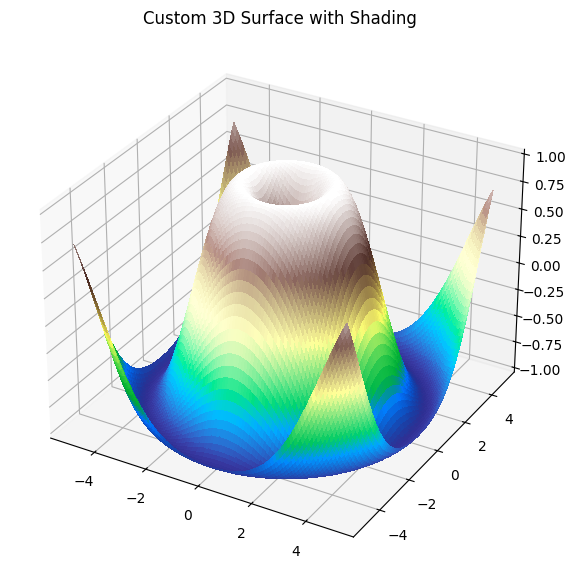

In [36]:
# Create synthetic 3D surface data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))  # Wavy surface

# Lighting
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(z, cmap=plt.cm.terrain, vert_exag=0.1, blend_mode='soft')

# Plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 7))
surf = ax.plot_surface(x, y, z, facecolors=rgb, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, shade=False)

plt.title("Custom 3D Surface with Shading")
plt.show()

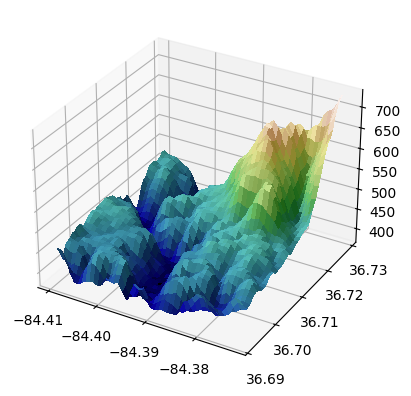

In [37]:
# Example graph out of the matplotlib gallery
# https://matplotlib.org/stable/gallery/mplot3d/custom_shaded_3d_surface.html#sphx-glr-gallery-mplot3d-custom-shaded-3d-surface-py
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz')
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()